[*********************100%***********************]  1 of 1 completed


Initial Data:
Price       Adj Close      Close       High        Low       Open     Volume
Ticker           META       META       META       META       META       META
Date                                                                        
2012-05-18  38.084518  38.230000  45.000000  38.000000  42.049999  573576400
2012-05-21  33.900501  34.029999  36.660000  33.000000  36.529999  168192700
2012-05-22  30.882032  31.000000  33.590000  30.940001  32.610001  101786600
2012-05-23  31.878229  32.000000  32.500000  31.360001  31.370001   73600000
2012-05-24  32.904308  33.029999  33.209999  31.770000  32.950001   50237200

Data Columns:
MultiIndex([('Adj Close', 'META'),
            (    'Close', 'META'),
            (     'High', 'META'),
            (      'Low', 'META'),
            (     'Open', 'META'),
            (   'Volume', 'META')],
           names=['Price', 'Ticker'])

Adjusted Close Prices:
Price       Adj Close
Ticker           META
Date                 
2012-05-18  38.0

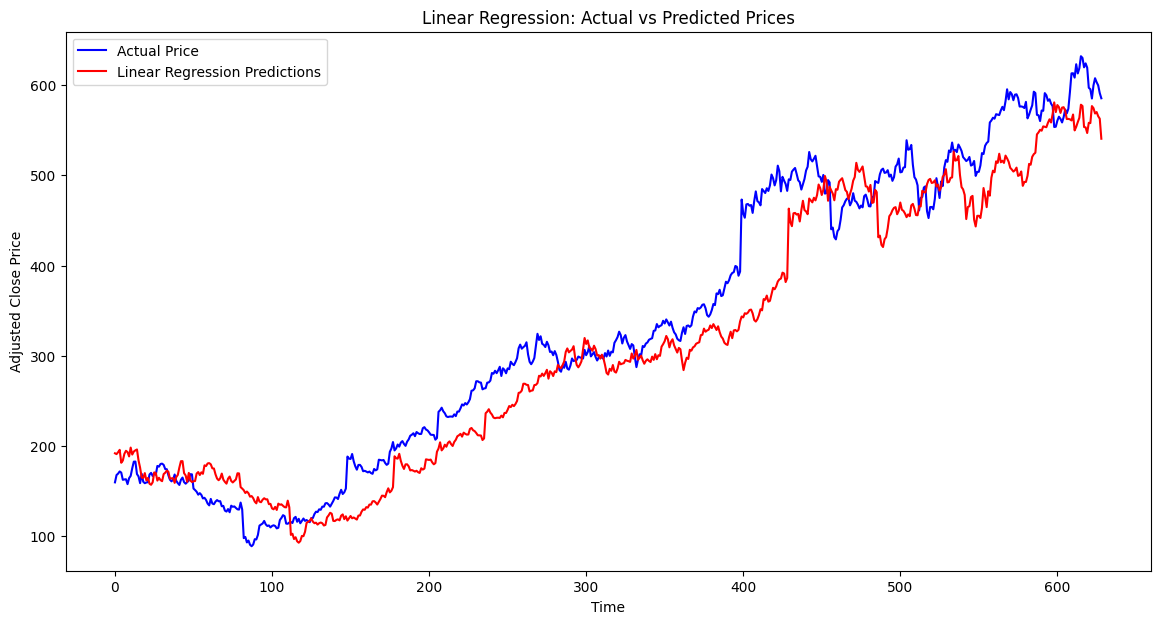

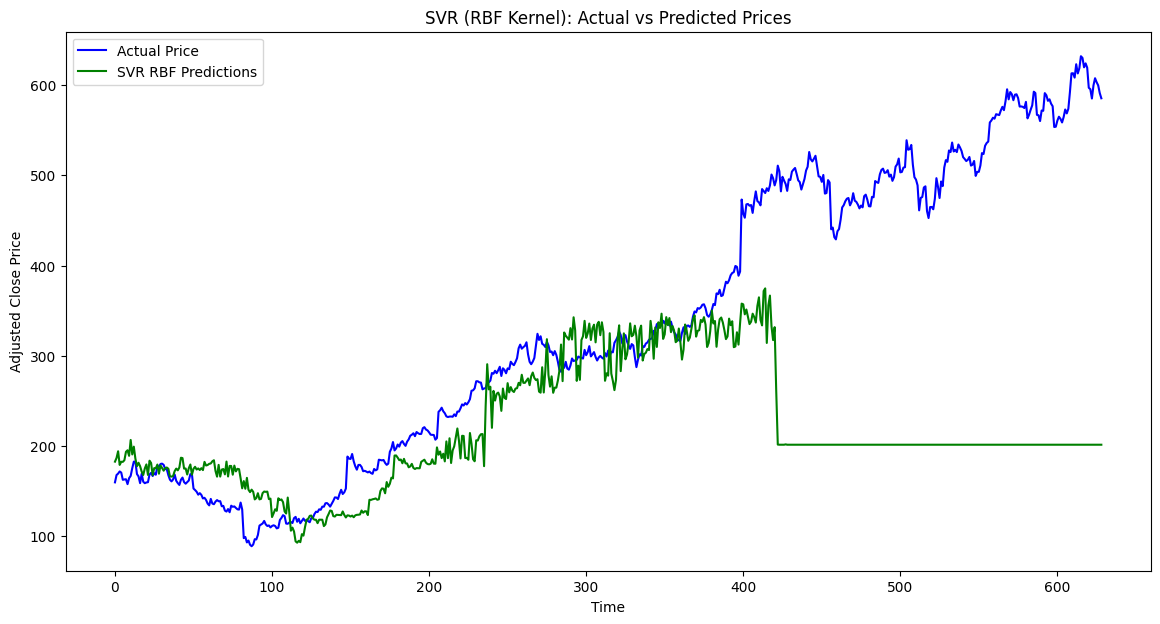

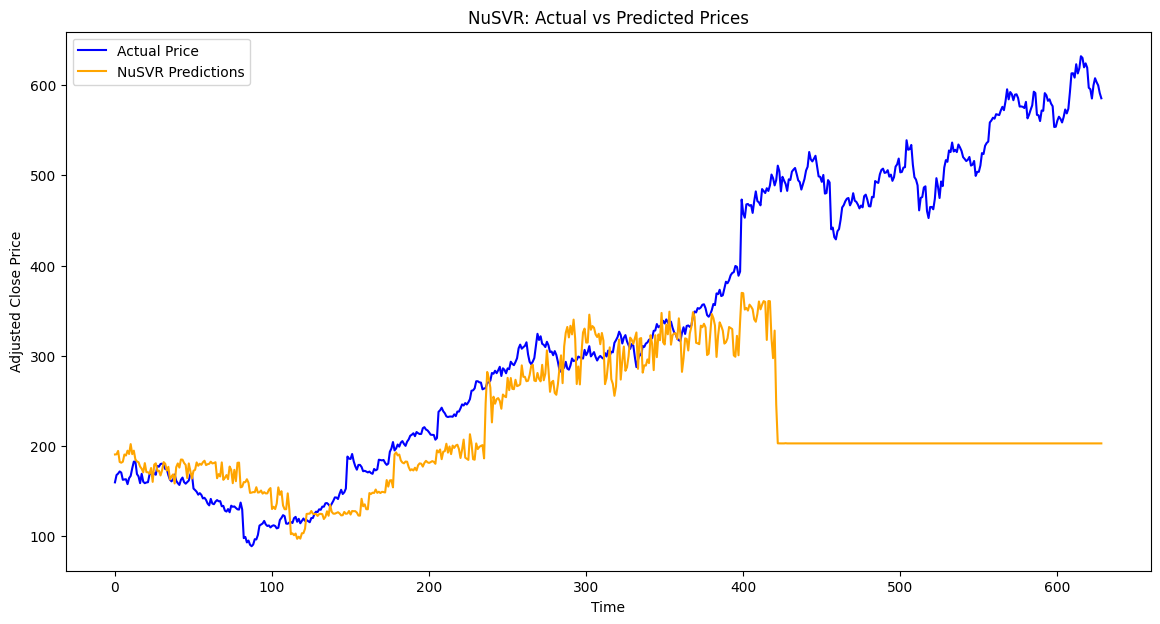


Future Price Predictions:
            Future_Price_LR  Future_Price_SVR_RBF  Future_Price_NuSVR
2024-11-18       570.187747            201.175737           202.63995
2024-11-19       577.996533            201.175737           202.63995
2024-11-20       575.704897            201.175737           202.63995
2024-11-21       569.272987            201.175737           202.63995
2024-11-22       575.165733            201.175737           202.63995


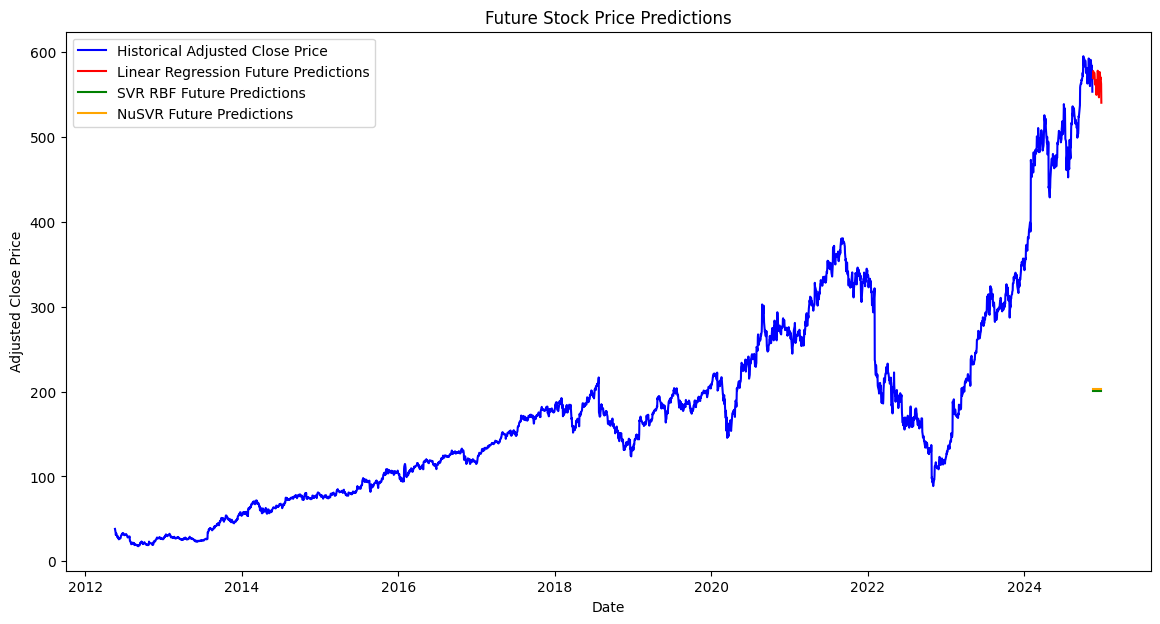

In [1]:
0# Stock Price Prediction using Machine Learning Models

# Installing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, NuSVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
import yfinance as yf
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Fetching stock data for Meta Platforms (formerly Facebook, ticker 'META')
df = yf.download("META", start="2010-01-01", end="2025-01-01")

# Display the first few rows of the data
print("Initial Data:")
print(df.head())

# Display column names
print("\nData Columns:")
print(df.columns)

# Select the 'Adj Close' price for modeling
df = df[['Adj Close']]
print("\nAdjusted Close Prices:")
print(df.head())

# Define the number of days to forecast into the future
forecast_out = 30  # Predict the next 30 days

# Create the 'Prediction' column by shifting 'Adj Close' up by 'forecast_out' days
df['Prediction'] = df[['Adj Close']].shift(-forecast_out)
print("\nData with Prediction Column:")
print(df.head())

# Prepare the feature dataset (X) and the target dataset (y)
X = np.array(df.drop(['Prediction'], axis=1))  # Features: Adjusted Close
X = X[:-forecast_out]  # Remove the last 'forecast_out' rows

# Replace NaN values and prepare the target dataset
df.dropna(inplace=True)
y = np.array(df['Prediction'])  # Targets: Future Adjusted Close

# Split the data into training and testing sets
# Using shuffle=False to maintain the sequential nature of time series data
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False)

# Initialize the models
# Linear Regression
lr = LinearRegression()

# Support Vector Regression with RBF kernel
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)

# Nu Support Vector Regression
nu_svr = NuSVR(nu=0.2, C=1e3, kernel='rbf', gamma=0.1)

# Train the models
print("\nTraining Models...")
lr.fit(x_train, y_train)
svr_rbf.fit(x_train, y_train)
nu_svr.fit(x_train, y_train)
print("Training Completed!")

# Making predictions
predictions_lr = lr.predict(x_test)
predictions_svr_rbf = svr_rbf.predict(x_test)
predictions_nu_svr = nu_svr.predict(x_test)

# Evaluate the models
r2_lr = r2_score(y_test, predictions_lr)
r2_svr_rbf = r2_score(y_test, predictions_svr_rbf)
r2_nu_svr = r2_score(y_test, predictions_nu_svr)

mae_lr = mean_absolute_error(y_test, predictions_lr)
mae_svr_rbf = mean_absolute_error(y_test, predictions_svr_rbf)
mae_nu_svr = mean_absolute_error(y_test, predictions_nu_svr)

print("\nModel Performance:")
print(f"Linear Regression R²: {r2_lr:.4f}, MAE: {mae_lr:.2f}")
print(f"SVR (RBF Kernel) R²: {r2_svr_rbf:.4f}, MAE: {mae_svr_rbf:.2f}")
print(f"NuSVR R²: {r2_nu_svr:.4f}, MAE: {mae_nu_svr:.2f}")

# Plotting the actual vs predicted prices for Linear Regression
plt.figure(figsize=(14,7))
plt.plot(y_test, label='Actual Price', color='blue')
plt.plot(predictions_lr, label='Linear Regression Predictions', color='red')
plt.title('Linear Regression: Actual vs Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

# Plotting the actual vs predicted prices for SVR RBF
plt.figure(figsize=(14,7))
plt.plot(y_test, label='Actual Price', color='blue')
plt.plot(predictions_svr_rbf, label='SVR RBF Predictions', color='green')
plt.title('SVR (RBF Kernel): Actual vs Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

# Plotting the actual vs predicted prices for NuSVR
plt.figure(figsize=(14,7))
plt.plot(y_test, label='Actual Price', color='blue')
plt.plot(predictions_nu_svr, label='NuSVR Predictions', color='orange')
plt.title('NuSVR: Actual vs Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

# Future Price Prediction
# Prepare the data for future prediction
# We will use the last 'forecast_out' data points to predict the next 'forecast_out' days
future_X = np.array(df.drop(['Prediction'], axis=1))[-forecast_out:]

# Since our models expect the same number of features as training, and currently we have only 'Adj Close'
# We'll reshape the data accordingly
future_X = future_X.reshape(-1, 1)

# Make future predictions
future_pred_lr = lr.predict(future_X)
future_pred_svr_rbf = svr_rbf.predict(future_X)
future_pred_nu_svr = nu_svr.predict(future_X)

# Create a DataFrame to hold the future predictions
future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forecast_out, freq='B')  # 'B' for business days
future_df = pd.DataFrame(index=future_dates)
future_df['Future_Price_LR'] = future_pred_lr
future_df['Future_Price_SVR_RBF'] = future_pred_svr_rbf
future_df['Future_Price_NuSVR'] = future_pred_nu_svr

print("\nFuture Price Predictions:")
print(future_df.head())

# Plotting Future Predictions
plt.figure(figsize=(14,7))
plt.plot(df['Adj Close'], label='Historical Adjusted Close Price', color='blue')
plt.plot(future_df['Future_Price_LR'], label='Linear Regression Future Predictions', color='red')
plt.plot(future_df['Future_Price_SVR_RBF'], label='SVR RBF Future Predictions', color='green')
plt.plot(future_df['Future_Price_NuSVR'], label='NuSVR Future Predictions', color='orange')
plt.title('Future Stock Price Predictions')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()